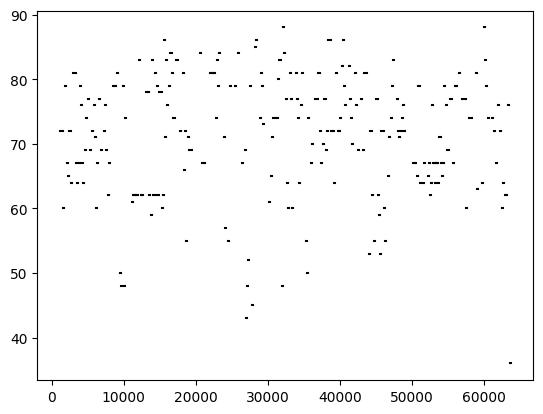

In [8]:
import mido
import matplotlib.pyplot as plt


def read_midi(file_path):
    # C5 is the 72nd note in the MIDI standard
    # 240 is quarter note at 120 bpm
    notes: list[tuple[int, int, int]] = []
    # Open the MIDI file
    with mido.MidiFile(file_path) as midi_file:
        # Iterate over each track in the MIDI file
        for i, track in enumerate(midi_file.tracks):
            # print(f"Track {i}:")
            
            # Initialize variables to keep track of note start times
            current_time = 0
            note_start_times = {}
            
            # Iterate over each message in the track
            for msg in track:
                # Update current time based on the message time
                current_time += msg.time
                
                # If it's a note-on message, store the note and its start time
                if msg.type == 'note_on' and msg.velocity != 0:
                    note_start_times[msg.note] = current_time
                
                # If it's a note-off message, calculate the duration and print the note
                elif msg.type == 'note_off' or (msg.type == 'note_on' and msg.velocity == 0):
                    note = msg.note
                    start_time = note_start_times.pop(note, None)
                    if start_time is not None:
                        # duration = current_time - start_time
                        # print(f"Note {note} at time {start_time}, duration {duration}")
                        # plt.plot([start_time, current_time], [note, note], 'k-')
                        notes.append((start_time, current_time, note))
    return notes                

# Provide the path to your MIDI file
midi_file_path = "545.mid"
notes: list[tuple[int, int, int]] = read_midi(midi_file_path)
# plt.show()

# change notes so only one note is played at a time, the highest note is played
notes.sort(key=lambda x: x[0])
new_notes = []
new_notes.append(notes.pop(0))
for note in notes:
    if note[0] < new_notes[-1][1]:
        if note[2] > new_notes[-1][2]:
            new_notes[-1] = (new_notes[-1][0], note[0], new_notes[-1][2])
    else:
        new_notes.append(note)
notes = new_notes

for note in notes:
    plt.plot([note[0], note[1]], [note[2], note[2]], 'k-')


    

In [13]:
d = 2**(1/12)
n = 16.351597831287414
c = 12
for o in range(9):
    for t in ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "H"]:
        print(f"{c:>2} {t+chr(8320+o):3} {n:.02f} Hz")
        n *= d
        c += 1




12 C₀  16.35 Hz
13 C#₀ 17.32 Hz
14 D₀  18.35 Hz
15 D#₀ 19.45 Hz
16 E₀  20.60 Hz
17 F₀  21.83 Hz
18 F#₀ 23.12 Hz
19 G₀  24.50 Hz
20 G#₀ 25.96 Hz
21 A₀  27.50 Hz
22 A#₀ 29.14 Hz
23 H₀  30.87 Hz
24 C₁  32.70 Hz
25 C#₁ 34.65 Hz
26 D₁  36.71 Hz
27 D#₁ 38.89 Hz
28 E₁  41.20 Hz
29 F₁  43.65 Hz
30 F#₁ 46.25 Hz
31 G₁  49.00 Hz
32 G#₁ 51.91 Hz
33 A₁  55.00 Hz
34 A#₁ 58.27 Hz
35 H₁  61.74 Hz
36 C₂  65.41 Hz
37 C#₂ 69.30 Hz
38 D₂  73.42 Hz
39 D#₂ 77.78 Hz
40 E₂  82.41 Hz
41 F₂  87.31 Hz
42 F#₂ 92.50 Hz
43 G₂  98.00 Hz
44 G#₂ 103.83 Hz
45 A₂  110.00 Hz
46 A#₂ 116.54 Hz
47 H₂  123.47 Hz
48 C₃  130.81 Hz
49 C#₃ 138.59 Hz
50 D₃  146.83 Hz
51 D#₃ 155.56 Hz
52 E₃  164.81 Hz
53 F₃  174.61 Hz
54 F#₃ 185.00 Hz
55 G₃  196.00 Hz
56 G#₃ 207.65 Hz
57 A₃  220.00 Hz
58 A#₃ 233.08 Hz
59 H₃  246.94 Hz
60 C₄  261.63 Hz
61 C#₄ 277.18 Hz
62 D₄  293.66 Hz
63 D#₄ 311.13 Hz
64 E₄  329.63 Hz
65 F₄  349.23 Hz
66 F#₄ 369.99 Hz
67 G₄  392.00 Hz
68 G#₄ 415.30 Hz
69 A₄  440.00 Hz
70 A#₄ 466.16 Hz
71 H₄  493.88 Hz
72 C₅  523.2